In [2]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import adam_v2
from sklearn.metrics import log_loss

from utils import scoring_function

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
plt.rcParams['figure.figsize'] = (15, 8)
plt.rc('axes', axisbelow=True)

In [3]:
X_train = pd.read_feather('X_train_standard.f').set_index('sku')
X_val = pd.read_feather('X_val_standard.f').set_index('sku')
y_train = pd.read_feather('y_train.f').set_index('sku').iloc[:, 0]
y_val = pd.read_feather('y_val.f').set_index('sku').iloc[:, 0]
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(432587, 40) (144196, 40) (432587,) (144196,)


In [4]:
np.random.seed(10)
tf.random.set_seed(20)
random.seed(30)    

epochs = 300

# very simple NN
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='softmax'))

adam = adam_v2.Adam(learning_rate=0.0005) # default: 0.001
model.compile(loss='categorical_crossentropy', optimizer=adam)

es = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
h = model.fit(
    X_train,
    to_categorical(y_train, num_classes=30),
    validation_data=(X_val, to_categorical(y_val, num_classes=30)),
    epochs=epochs,
    batch_size=32,
    callbacks=[es]
)

2021-09-20 20:36:09.387879: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-20 20:36:09.803529: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
13519/13519 [==============================] - 25s 927us/step - loss: 3.5850 - val_loss: 3.2768
Epoch 2/300
13519/13519 [==============================] - 15s 1ms/step - loss: 3.2561 - val_loss: 3.1923
Epoch 3/300
13519/13519 [==============================] - 13s 974us/step - loss: 3.1878 - val_loss: 3.1739
Epoch 4/300
13519/13519 [==============================] - 12s 865us/step - loss: 3.1712 - val_loss: 3.1607
Epoch 5/300
13519/13519 [==============================] - 13s 929us/step - loss: 3.1563 - val_loss: 3.1561
Epoch 6/300
13519/13519 [==============================] - 14s 1ms/step - loss: 3.1517 - val_loss: 3.1468
Epoch 7/300
13519/13519 [==============================] - 12s 891us/step - loss: 3.1458 - val_loss: 3.1445
Epoch 8/300
13519/13519 [==============================] - 11s 841us/step - loss: 3.1432 - val_loss: 3.1401
Epoch 9/300
13519/13519 [==============================] - 12s 865us/step - loss: 3.1378 - val_loss: 3.1370
Epoch 10/300
13519/13519 [======

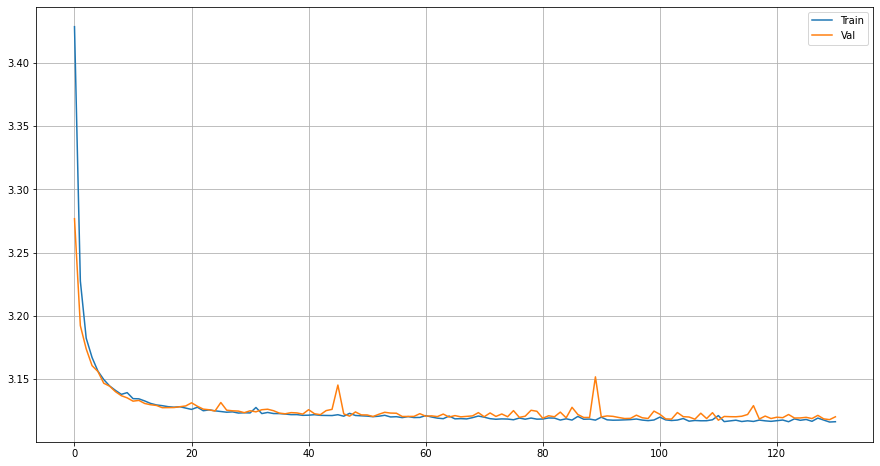

In [5]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Train', 'Val'])
plt.grid();

In [6]:
%%time

# predictions
probs_train = model.predict(X_train)
probs_val = model.predict(X_val)

log_train = log_loss(y_train, probs_train)
log_val = log_loss(y_val, probs_val)
print('Log loss (train):', log_train)
print('Log loss (val):', log_val)

rps_train = scoring_function(y_train + 1, probs_train)
rps_val = scoring_function(y_val + 1, probs_val)
print('RPS (train):', rps_train)
print('RPS (val):', rps_val)

Log loss (train): 3.1138222741611132
Log loss (val): 3.1192589680188854
RPS (train): 3.662961944065668
RPS (val): 3.678533428175507
CPU times: user 10.1 s, sys: 1.99 s, total: 12.1 s
Wall time: 9.14 s


### Save predictions

In [7]:
pd.DataFrame(probs_val).to_csv('3.1-probs-nn-one-layer-32.csv')

## Submission

In [8]:
X_test = pd.read_feather('X_test_standard.f').set_index('sku')
X_test

,sold_quantity_17,sold_quantity_18,sold_quantity_19,sold_quantity_20,sold_quantity_21,sold_quantity_25,sold_quantity_26,sold_quantity_27,sold_quantity_28,sold_quantity_29,sold_quantity_30,minutes_active_29,minutes_active_30,roll_mean_sold_30_11,roll_mean_sold_29_10,roll_mean_sold_28_9,roll_mean_sold_27_8,roll_mean_sold_26_7,roll_mean_sold_25_6,roll_mean_sold_24_5,roll_mean_minutes_30_11,roll_mean_minutes_29_10,roll_mean_minutes_26_7,roll_mean_minutes_25_6,roll_mean_minutes_24_5,roll_mean_price_30_11,roll_mean_price_29_10,roll_mean_price_27_8,roll_mean_price_25_6,roll_mean_price_24_5,roll_sum_zero_sold_30_11,roll_sum_zero_sold_24_5,roll_sum_shipping_logistic_type_fulfillment_30_11,roll_sum_shipping_logistic_type_cross_docking_30_11,roll_sum_shipping_logistic_type_fulfillment_28_9,roll_sum_shipping_logistic_type_fulfillment_26_7,roll_sum_shipping_logistic_type_fulfillment_25_6,roll_sum_shipping_logistic_type_fulfillment_24_5,roll_sum_shipping_payment_free_shipping_28_9,target_stock
sku,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
464801,-0.096217,-0.090172,-0.099056,-0.10158,0.097635,-0.084454,-0.079735,-0.102219,-0.094906,-0.118098,-0.115690,0.530162,0.533972,-0.095625,-0.094022,-0.087551,-0.087259,-0.087144,-0.087088,-0.086720,0.737185,0.744720,0.763959,0.769021,0.774894,0.000237,0.000191,-0.004176,-0.00350,-0.003556,0.527432,0.314442,0.479567,-0.297576,0.494024,0.50752,0.514066,0.520863,1.490386,-0.124437
645793,-0.000423,0.074500,-0.099056,-0.10158,0.018155,-0.084454,-0.079735,-0.102219,0.009552,-0.118098,-0.115690,0.530162,0.533972,-0.077280,-0.075858,-0.069648,-0.063206,-0.062798,-0.062530,-0.062069,0.737185,0.744720,0.763959,0.769021,0.774894,0.000237,0.000191,-0.004176,-0.00350,-0.003556,-0.073491,-0.266020,0.479567,-0.297576,0.494024,0.50752,0.514066,0.520863,1.490386,-0.116708
99516,-0.096217,-0.090172,-0.099056,-0.10158,-0.061326,0.064437,-0.079735,0.411154,0.427382,0.277992,0.364686,0.530162,0.533972,0.045019,0.027074,0.013903,0.002940,-0.008019,0.011142,0.005720,0.117517,0.128402,0.160092,0.169554,0.179085,-0.004385,-0.004378,-0.004405,-0.00362,-0.003677,-0.474106,-0.652995,-0.792469,-0.297576,-0.744423,-0.69828,-0.676118,-0.654889,-0.686343,-0.085792
538100,-0.000423,-0.090172,-0.099056,-0.10158,-0.061326,-0.010009,-0.079735,0.000456,0.114009,0.277992,0.268610,0.530162,0.533972,-0.016131,-0.021365,-0.039808,-0.045166,-0.050625,-0.044112,-0.049744,0.737185,0.744720,0.763959,0.769021,0.774894,-0.004385,-0.004378,-0.004405,-0.00362,-0.003677,-0.874720,-0.459507,0.479567,-0.297576,0.494024,0.50752,0.514066,0.520863,-0.686343,-0.085792
557191,-0.096217,-0.090172,-0.099056,-0.10158,-0.061326,-0.084454,-0.079735,-0.102219,-0.094906,-0.118098,0.076460,0.530162,0.533972,-0.107855,-0.118242,-0.117391,-0.117325,-0.105404,-0.105506,-0.105208,-1.222632,-1.352601,-1.631688,-1.609169,-1.588786,-0.004385,-0.004378,-0.004405,-0.00362,-0.003677,0.928047,0.894904,0.479567,-0.297576,0.494024,0.50752,0.514066,0.520863,-0.686343,-0.070334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129187,-0.096217,-0.090172,-0.099056,-0.10158,-0.061326,-0.084454,-0.079735,-0.102219,-0.094906,-0.118098,-0.115690,-1.943069,-1.502754,-0.120085,-0.118242,-0.117391,-0.117325,-0.117577,-0.117785,-0.117533,-2.213161,-2.217213,-2.138135,-2.111925,-2.088475,-0.004385,-0.004378,-0.004405,-0.00362,-0.003677,-2.677488,-2.781355,-2.700524,-0.297576,-2.602093,-2.50698,-2.461394,-2.418515,-0.686343,-0.085792
6707,-0.096217,-0.090172,-0.099056,-0.10158,-0.061326,-0.084454,-0.079735,-0.102219,-0.094906,-0.118098,-0.115690,-1.943069,-1.505581,-0.120085,-0.118242,-0.117391,-0.117325,-0.117577,-0.117785,-0.117533,-2.213329,-2.217213,-2.138135,-2.111925,-2.088475,-0.004385,-0.004378,-0.004405,-0.00362,-0.003677,-2.677488,-2.781355,-2.700524,-0.060230,-2.602093,-2.50698,-2.461394,-2.418515,-0.686343,0.084246
170355,-0.096217,-0.090172,-0.099056,-0.10158,-0.0613

In [9]:
# how many NAs 
X_test.isnull().sum()

sold_quantity_17                                       0
sold_quantity_18                                       0
sold_quantity_19                                       0
sold_quantity_20                                       0
sold_quantity_21                                       0
sold_quantity_25                                       0
sold_quantity_26                                       0
sold_quantity_27                                       0
sold_quantity_28                                       0
sold_quantity_29                                       0
sold_quantity_30                                       0
minutes_active_29                                      0
minutes_active_30                                      0
roll_mean_sold_30_11                                   0
roll_mean_sold_29_10                                   0
roll_mean_sold_28_9                                    0
roll_mean_sold_27_8                                    0
roll_mean_sold_26_7            

In [10]:
%%time

final_y_pred_nn = model.predict(X_test)

CPU times: user 8.91 s, sys: 1.66 s, total: 10.6 s
Wall time: 7.68 s


In [11]:
final_y_pred_nn

array([[1.36590451e-02, 2.57467665e-02, 3.54938060e-02, ...,
        1.52956424e-02, 1.17993020e-02, 8.01451690e-03],
       [4.93532559e-03, 1.69685632e-02, 2.89007910e-02, ...,
        1.37665495e-02, 8.68697651e-03, 5.17488038e-03],
       [2.51003087e-01, 2.27738529e-01, 1.55520961e-01, ...,
        7.62241601e-04, 6.88130851e-04, 6.50360773e-04],
       ...,
       [3.40627943e-04, 9.49128706e-04, 3.37733724e-03, ...,
        6.90114796e-02, 4.41541225e-02, 4.94495146e-02],
       [1.14059187e-02, 1.20163914e-02, 2.15291791e-02, ...,
        4.70974743e-02, 3.17597352e-02, 3.80777493e-02],
       [7.57517782e-09, 5.12989391e-06, 9.77990785e-05, ...,
        6.69068173e-02, 4.17152122e-02, 2.97623500e-02]], dtype=float32)

In [12]:
final_y_pred_nn.shape

(551472, 30)

## Creating DataFrame with predictions

In [13]:
%%time

X_test_sub = pd.DataFrame(final_y_pred_nn, columns=range(1, 31))
X_test_sub = X_test_sub.astype(float)
X_test_sub

CPU times: user 160 ms, sys: 45.3 ms, total: 205 ms
Wall time: 211 ms


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1.365905e-02,0.025747,0.035494,0.039322,0.038123,0.040007,0.049261,0.056385,0.056271,0.057955,0.045832,0.036673,0.038136,0.044078,0.044692,0.044576,0.041030,0.036218,0.028938,0.026893,0.028980,0.031269,0.027104,0.026480,0.019834,0.015685,0.016250,0.015296,0.011799,0.008015
1,4.935326e-03,0.016969,0.028901,0.037807,0.039920,0.041487,0.053913,0.063660,0.059959,0.065777,0.049301,0.039782,0.043458,0.046389,0.045606,0.046141,0.043256,0.035481,0.029220,0.027716,0.027080,0.029754,0.026941,0.023869,0.017534,0.013567,0.013947,0.013767,0.008687,0.005175
2,2.510031e-01,0.227739,0.155521,0.101356,0.066518,0.045883,0.035650,0.027778,0.017459,0.014165,0.009412,0.006965,0.005200,0.005197,0.004850,0.004495,0.003310,0.002592,0.001926,0.001764,0.001735,0.001779,0.001513,0.001317,0.001136,0.000750,0.000887,0.000762,0.000688,0.000650
3,8.849484e-03,0.046022,0.076318,0.075585,0.091568,0.067799,0.070735,0.076430,0.058680,0.055814,0.046874,0.038594,0.032738,0.032110,0.029493,0.028290,0.024404,0.019061,0.015200,0.014644,0.014106,0.014195,0.012362,0.011267,0.008715,0.006940,0.007207,0.006560,0.005241,0.004200
4,2.354006e-03,0.009160,0.017196,0.021125,0.027195,0.028443,0.036530,0.044038,0.047703,0.050473,0.044839,0.039908,0.039343,0.046460,0.051257,0.050585,0.048646,0.042794,0.035981,0.033048,0.040338,0.038613,0.037519,0.038116,0.029414,0.024535,0.023605,0.022392,0.016929,0.011461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551467,7.769506e-06,0.000133,0.000647,0.001741,0.002555,0.003839,0.006263,0.008883,0.014120,0.016747,0.017827,0.014006,0.024499,0.021765,0.031059,0.034810,0.054788,0.060147,0.036715,0.039249,0.040851,0.112356,0.060007,0.063671,0.059593,0.046720,0.071724,0.071208,0.045513,0.038556
551468,1.277076e-09,0.000003,0.000075,0.000597,0.001508,0.003740,0.007394,0.011041,0.016934,0.021555,0.020089,0.018696,0.031858,0.034758,0.041881,0.052781,0.063458,0.067605,0.039217,0.050993,0.053279,0.106113,0.060825,0.057431,0.054456,0.042363,0.052732,0.050272,0.024821,0.013526
551469,3.406279e-04,0.000949,0.003377,0.005541,0.007497,0.007422,0.011217,0.015393,0.026411,0.025877,0.024767,0.018509,0.024923,0.027040,0.036168,0.035961,0.059571,0.054977,0.030946,0.035764,0.035587,0.106989,0.045978,0.052622,0.047822,0.027593,0.068143,0.069011,0.044154,0.049450
551470,1.140592e-02,0.012016,0.021529,0.024266,0.022996,0.019841,0.026137,0.029340,0.046717,0.040069,0.033648,0.022142,0.030140,0.028988,0.035878,0.033980,0.053581,0.048542,0.027439,0.028826,0.027634,0.081862,0.034885,0.037301,0.034852,0.019932,0.049117,0.047097,0.031760,0.038078


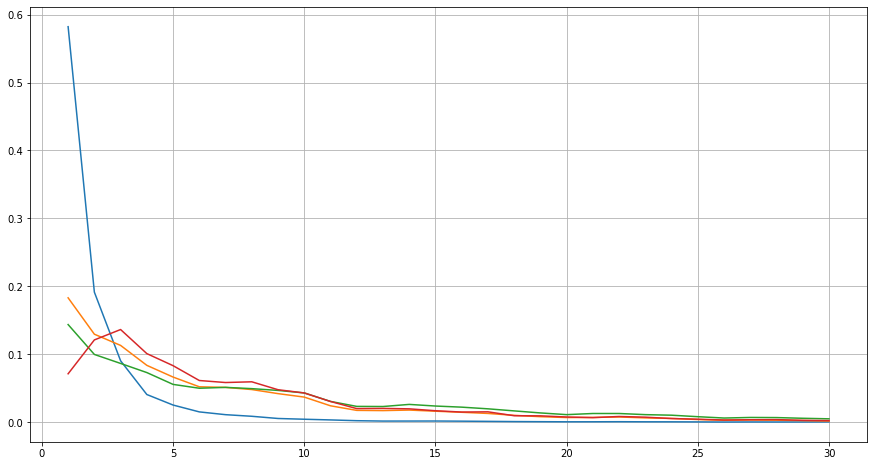

In [14]:
# check probabilites for random skus
for _ in range(1, 5):
    random_sku = X_test_sub.sample(1)
    plt.plot(range(1, 31), random_sku.values.squeeze())
plt.grid();

In [15]:
X_test_sub.sum(axis=1).value_counts().sort_index()

1.0    1
1.0    1
1.0    1
1.0    1
1.0    1
      ..
1.0    1
1.0    1
1.0    1
1.0    1
1.0    1
Length: 85498, dtype: int64

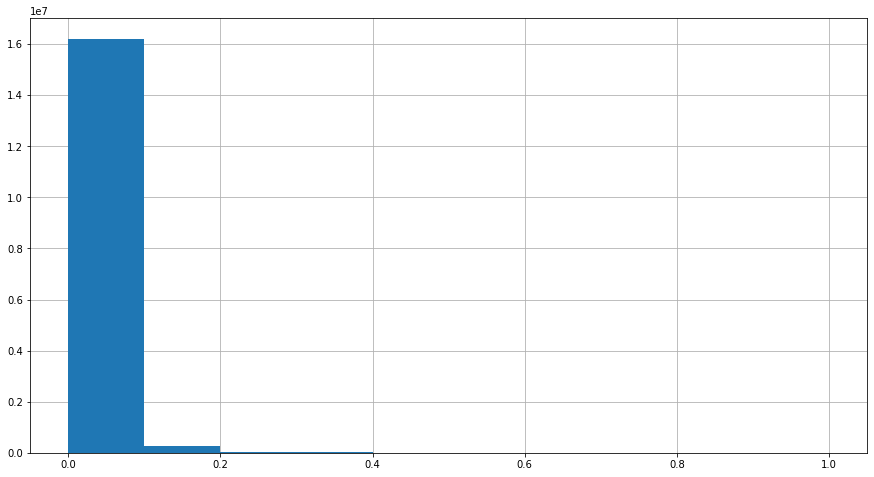

In [16]:
plt.hist(X_test_sub.values.reshape(-1))
plt.grid();

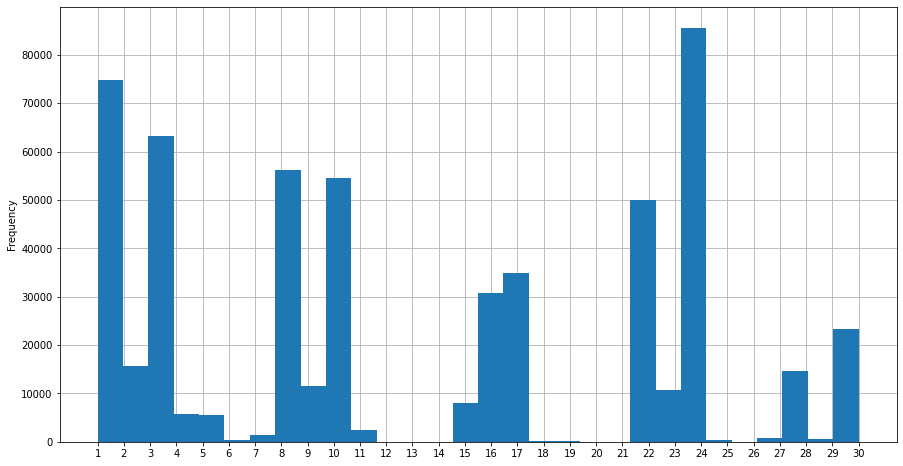

In [17]:
X_test_sub.idxmax(axis=1).plot.hist(bins=30)
plt.xticks(range(1, 31))
plt.grid();

Pretty different from LGBM predictions.   

In [18]:
X_test_sub.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
count,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,5.514720e+05,5.514720e+05,5.514720e+05,5.514720e+05,5.514720e+05,551472.000000,5.514720e+05,551472.000000,551472.000000,5.514720e+05,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000
mean,0.050922,0.043485,0.044390,0.037281,0.034938,0.030845,0.035388,4.031147e-02,3.897440e-02,4.033909e-02,3.457703e-02,2.767145e-02,0.029591,3.380846e-02,0.036569,0.036661,3.736359e-02,0.033214,0.029453,0.027493,0.030475,0.035824,0.033340,0.033832,0.027949,0.024122,0.025484,0.026107,0.021173,0.018420
std,0.110464,0.062425,0.050017,0.033785,0.028101,0.021190,0.021095,2.117326e-02,1.706461e-02,1.679844e-02,1.307059e-02,1.082803e-02,0.011157,1.277828e-02,0.014467,0.015654,1.684666e-02,0.016377,0.015459,0.014807,0.017261,0.021750,0.020812,0.022725,0.019786,0.018146,0.019856,0.021067,0.018363,0.019431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.376646e-36,1.016562e-31,3.712973e-30,1.695091e-28,3.832159e-32,0.000000,8.590849e-38,0.000000,0.000000,4.367931e-34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000215,0.001673,0.004593,0.007384,0.010011,0.011989,0.017092,2.284673e-02,2.551146e-02,2.797258e-02,2.583229e-02,2.107226e-02,0.023779,2.746615e-02,0.028732,0.026773,2.515195e-02,0.019644,0.015915,0.014302,0.014494,0.015479,0.013345,0.011872,0.008919,0.006710,0.007001,0.006579,0.004765,0.003334
50%,0.002586,0.011013,0.021321,0.025697,0.027717,0.026817,0.032491,3.799608e-02,3.822447e-02,3.958915e-02,3.495624e-02,2.774311e-02,0.030714,3.610659e-02,0.040904,0.040743,4.212032e-02,0.037674,0.032418,0.030060,0.032963,0.037970,0.035019,0.034246,0.027230,0.022393,0.022458,0.022102,0.016107,0.010624
75%,0.035482,0.063040,0.077339,0.066008,0.057902,0.049059,0.052754,5.699276e-02,5.313037e-02,5.349386e-02,4.433072e-02,3.545784e-02,0.037323,4.314112e-02,0.047498,0.048844,5.049463e-02,0.046278,0.042161,0.040170,0.046187,0.054441,0.051996,0.053518,0.044612,0.038878,0.041585,0.042907,0.034881,0.029869
max,0.999872,0.998519,0.999998,0.220135,1.000000,0.302767,0.261616,5.057332e-01,5.086496e-01,3.373353e-01,2.560698e-01,5.587589e-01,0.712937,3.592974e-01,0.706429,0.311662,6.472700e-01,0.106529,0.513319,0.085274,0.145688,0.913767,0.517235,0.145636,0.859147,0.459230,0.533557,0.945968,0.176657,0.879738


In [19]:
%%time

X_test_sub.to_csv(
    '3.1-nn-one-layer-32.csv.gz',
    compression='gzip',
    index=False,
    header=False
)

CPU times: user 1min 46s, sys: 1.4 s, total: 1min 47s
Wall time: 1min 51s
